In [38]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\Users\Darek_PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Darek_PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Darek_PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Darek_PC\anaconda3\lib\site-packages\tensorflow\python\framewo

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [29]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# load dataset
dataset = read_csv('data\\6_extended_data\\VLKAF_final_data_with_sentiment.csv', header=0, index_col=0)
#dataset.timestamp = pd.to_datetime(dataset.timestamp)
values = dataset.values
#print(values)
# integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])
print(values[:,0])
# ensure all data is float
values[:,1:] = values[:,1:].astype('float32')
values = values[:,1:]
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

[0 1 2 ... 2427 2428 2429]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.495385   0.437126   0.524318   0.347402   0.334454        0.5  0.483838
2   0.483838   0.443114   0.529063   0.339324   0.335721        0.5  0.472703
3   0.472703   0.445110   0.530249   0.337412   0.320495        0.5  0.477123
4   0.477123   0.445110   0.530249   0.337412   0.319815        0.5  0.484842
5   0.484842   0.441118   0.528470   0.340471   0.308536        0.5  0.480988


In [36]:
# split into train and test sets
values = reframed.values
print(len(values))
split_ratio = 0.33
division_moment = int(len(values)*(1-split_ratio))
print(division_moment)
#n_train_hours = 365 * 24
# train = values[:n_train_hours, :]
# test = values[n_train_hours:, :]
train = values[:division_moment, :]
test = values[division_moment:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

2429
1627
(1627, 1, 6) (1627,) (802, 1, 6) (802,)


Train on 1301 samples, validate on 326 samples
Epoch 1/50
1301/1301 [==============================] - 1s 735us/step - loss: 0.1128 - val_loss: 0.0360
Epoch 2/50
1301/1301 [==============================] - 0s 89us/step - loss: 0.0882 - val_loss: 0.0468
Epoch 3/50
1301/1301 [==============================] - 0s 93us/step - loss: 0.0792 - val_loss: 0.0298
Epoch 4/50
1301/1301 [==============================] - 0s 81us/step - loss: 0.0747 - val_loss: 0.0332
Epoch 5/50
1301/1301 [==============================] - 0s 81us/step - loss: 0.0710 - val_loss: 0.0336
Epoch 6/50
1301/1301 [==============================] - 0s 114us/step - loss: 0.0664 - val_loss: 0.0328
Epoch 7/50
1301/1301 [==============================] - 0s 114us/step - loss: 0.0621 - val_loss: 0.0347
Epoch 8/50
1301/1301 [==============================] - 0s 132us/step - loss: 0.0580 - val_loss: 0.0337
Epoch 9/50
1301/1301 [==============================] - 0s 115us/step - loss: 0.0541 - val_loss: 0.0359
Epoch 10/50
1301/1301

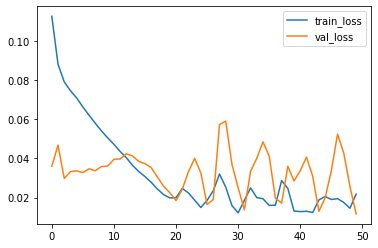

In [44]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split=0.2, verbose=1, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

In [61]:
history.__dict__

{'validation_data': [array([[[0.2342137 , 0.52295411, 0.62663108, 0.2959228 , 0.55535315,
           0.5       ]],
  
         [[0.23182457, 0.52495011, 0.62811386, 0.29453664, 0.55509633,
           0.5       ]],
  
         [[0.22340708, 0.53493014, 0.63790037, 0.28535922, 0.56001987,
           0.5       ]],
  
         ...,
  
         [[0.18052893, 0.66866271, 0.69306052, 0.37077585, 0.33388303,
           0.5       ]],
  
         [[0.18987605, 0.66267466, 0.68742587, 0.37498208, 0.3389924 ,
           0.66666669]],
  
         [[0.17385294, 0.67664673, 0.69869512, 0.36647392, 0.32457329,
           0.625     ]]]),
  array([[0.23182457],
         [0.22340708],
         [0.22655859],
         [0.23030911],
         [0.21998713],
         [0.22022096],
         [0.22045479],
         [0.22068857],
         [0.2224212 ],
         [0.22389248],
         [0.21972426],
         [0.21311825],
         [0.20754571],
         [0.20197317],
         [0.19640068],
         [0.18860876],
   

In [53]:
test_X.reshape(802,1,6)

array([[[0.16809745, 0.68662679, 0.70581259, 0.36131164, 0.30998522,
         0.5       ]],

       [[0.16755695, 0.68063874, 0.70195729, 0.36408395, 0.31703091,
         0.5       ]],

       [[0.17072366, 0.67797742, 0.69968367, 0.36580473, 0.32112197,
         0.5       ]],

       ...,

       [[0.74917751, 0.69660677, 0.28380783, 0.42153821, 0.75638251,
         0.5       ]],

       [[0.75903685, 0.69128414, 0.28301701, 0.42491596, 0.76467511,
         0.5       ]],

       [[0.76889631, 0.68596144, 0.28222618, 0.42829378, 0.77296763,
         1.        ]]])

In [102]:
# make a prediction
test_X = test_X.reshape(802, 1, 6)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
print(inv_yhat)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse_test_score = ((inv_y - inv_yhat) ** 2).mean()
print('Test MSE: %.3f' % mse_test_score)
#rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
#print('Test RMSE: %.3f' % rmse)

[[0.18647382 0.68662679 0.70581259 0.36131164 0.30998522 0.5       ]
 [0.18667753 0.68063874 0.70195729 0.36408395 0.31703091 0.5       ]
 [0.18951634 0.67797742 0.69968367 0.36580473 0.32112197 0.5       ]
 ...
 [0.65286452 0.69660677 0.28380783 0.42153821 0.75638251 0.5       ]
 [0.6624518  0.69128414 0.28301701 0.42491596 0.76467511 0.5       ]
 [0.6847778  0.68596144 0.28222618 0.42829378 0.77296763 1.        ]]
Test MSE: 138.076


In [86]:
inv_yhat.shape

(802,)

In [89]:
test_X[:,0]

array([0.16809745, 0.16755695, 0.17072366, 0.17389031, 0.17705701,
       0.17362522, 0.1846648 , 0.18099929, 0.17249874, 0.17013276,
       0.16776677, 0.16540073, 0.17514695, 0.17305957, 0.17961805,
       0.18606253, 0.18512462, 0.18418676, 0.1832489 , 0.18231098,
       0.19119575, 0.20772573, 0.20730901, 0.20908588, 0.21086269,
       0.21263951, 0.22362917, 0.22285414, 0.23139622, 0.23727668,
       0.2366648 , 0.23605291, 0.23544098, 0.22920091, 0.23081213,
       0.23636991, 0.23708671, 0.23250902, 0.22793134, 0.22335371,
       0.21135409, 0.20740192, 0.20273328, 0.20208159, 0.20509266,
       0.20810379, 0.21111486, 0.20001979, 0.1923563 , 0.18847573,
       0.18726375, 0.18637272, 0.18548169, 0.18459072, 0.1839631 ,
       0.18779927, 0.20517491, 0.23085464, 0.23308635, 0.23531801,
       0.23754972, 0.2459154 , 0.26018744, 0.2706073 , 0.26090158,
       0.26583234, 0.27076304, 0.27569379, 0.26827873, 0.27233744,
       0.27790263, 0.27476513, 0.27787856, 0.280992  , 0.28410

In [110]:
test_X[:,0].reshape(-1, 1)

array([[0.16809745],
       [0.16755695],
       [0.17072366],
       [0.17389031],
       [0.17705701],
       [0.17362522],
       [0.1846648 ],
       [0.18099929],
       [0.17249874],
       [0.17013276],
       [0.16776677],
       [0.16540073],
       [0.17514695],
       [0.17305957],
       [0.17961805],
       [0.18606253],
       [0.18512462],
       [0.18418676],
       [0.1832489 ],
       [0.18231098],
       [0.19119575],
       [0.20772573],
       [0.20730901],
       [0.20908588],
       [0.21086269],
       [0.21263951],
       [0.22362917],
       [0.22285414],
       [0.23139622],
       [0.23727668],
       [0.2366648 ],
       [0.23605291],
       [0.23544098],
       [0.22920091],
       [0.23081213],
       [0.23636991],
       [0.23708671],
       [0.23250902],
       [0.22793134],
       [0.22335371],
       [0.21135409],
       [0.20740192],
       [0.20273328],
       [0.20208159],
       [0.20509266],
       [0.20810379],
       [0.21111486],
       [0.200

In [114]:
test_X = scaler.inverse_transform(test_X)
test_X

array([[1.58325241e+02, 3.44000012e-02, 1.77200004e-01, 2.14440002e+11,
        9.03534973e+02, 1.00000000e+00],
       [1.58172729e+02, 3.40999998e-02, 1.75899997e-01, 2.15019995e+11,
        9.13960022e+02, 1.00000000e+00],
       [1.59066269e+02, 3.39666680e-02, 1.75133333e-01, 2.15380001e+11,
        9.20013306e+02, 1.00000000e+00],
       ...,
       [3.22286865e+02, 3.48999985e-02, 3.48999985e-02, 2.27040002e+11,
        1.56404004e+03, 1.00000000e+00],
       [3.25068848e+02, 3.46333347e-02, 3.46333347e-02, 2.27746660e+11,
        1.57631006e+03, 1.00000000e+00],
       [3.27850861e+02, 3.43666673e-02, 3.43666673e-02, 2.28453335e+11,
        1.58857996e+03, 2.00000000e+00]])

In [111]:
scaler.inverse_transform(test_X[:,0].reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (802,1) doesn't match the broadcast shape (802,6)

In [87]:
test_X.shape

(802, 6)

In [84]:
test_X.inverse_transform(test_X)

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

In [80]:
test_X[:, 1:]

array([[0.68662679, 0.70581259, 0.36131164, 0.30998522, 0.5       ],
       [0.68063874, 0.70195729, 0.36408395, 0.31703091, 0.5       ],
       [0.67797742, 0.69968367, 0.36580473, 0.32112197, 0.5       ],
       ...,
       [0.69660677, 0.28380783, 0.42153821, 0.75638251, 0.5       ],
       [0.69128414, 0.28301701, 0.42491596, 0.76467511, 0.5       ],
       [0.68596144, 0.28222618, 0.42829378, 0.77296763, 1.        ]])

In [77]:
inv_y

array([158.17272949, 159.06626892, 159.95979309, 160.85333252,
       159.88499451, 163.        , 161.9657135 , 159.56713867,
       158.89953613, 158.23193359, 157.5643158 , 160.31437683,
       159.72538757, 161.57597351, 163.39439392, 163.12974548,
       162.8651123 , 162.60047913, 162.33583069, 164.84281921,
       169.5070343 , 169.38945007, 169.89082336, 170.3921814 ,
       170.89353943, 173.99446106, 173.77577209, 176.18606567,
       177.84533691, 177.67268372, 177.50003052, 177.32736206,
       175.56661987, 176.02125549, 177.58947754, 177.79173279,
       176.50006104, 175.20838928, 173.91673279, 170.53083801,
       169.41566467, 168.09832764, 167.91444397, 168.7640686 ,
       169.6137085 , 170.46333313, 167.33267212, 165.17028809,
       164.07531738, 163.7333374 , 163.48191833, 163.23049927,
       162.97909546, 162.80200195, 163.88444519, 168.78727722,
       176.0332489 , 176.66296387, 177.29266357, 177.92237854,
       180.28289795, 184.30999756, 187.25013733, 184.51

In [76]:
inv_yhat

array([163.51044462, 163.56792592, 164.36894315, 165.17076345,
       165.97338263, 165.2907632 , 168.61773722, 167.90850257,
       164.73142731, 164.06756046, 163.49569062, 162.92420339,
       166.21780959, 165.55843327, 168.06681057, 169.44254837,
       169.05532004, 168.66813796, 168.2809769 , 167.89385369,
       170.35508042, 175.81762105, 174.91355289, 175.53017667,
       176.146935  , 176.76381947, 179.16821661, 177.85997972,
       181.10085162, 182.73193155, 182.64445031, 182.55697747,
       182.46951305, 180.33924847, 181.95806354, 182.78804636,
       183.47816683, 182.25518694, 181.03363242, 179.81352428,
       175.89461178, 174.88850179, 173.57635881, 173.4518391 ,
       172.89526144, 172.33907482, 171.78328342, 167.75107333,
       166.84754756, 165.48756867, 164.93897558, 164.47299899,
       164.00688785, 163.54064637, 163.80506628, 165.03916317,
       169.5967821 , 177.71193519, 178.21269656, 178.71376067,
       179.21514013, 182.19490116, 186.34357912, 189.64

In [ ]:
test_X = scaler.inverse_transform(test_X)
test_X

In [115]:
test_X[:, 0]

array([158.32524109, 158.17272949, 159.06626892, 159.95979309,
       160.85333252, 159.88499451, 163.        , 161.9657135 ,
       159.56713867, 158.89953613, 158.23193359, 157.5643158 ,
       160.31437683, 159.72538757, 161.57597351, 163.39439392,
       163.12974548, 162.8651123 , 162.60047913, 162.33583069,
       164.84281921, 169.5070343 , 169.38945007, 169.89082336,
       170.3921814 , 170.89353943, 173.99446106, 173.77577209,
       176.18606567, 177.84533691, 177.67268372, 177.50003052,
       177.32736206, 175.56661987, 176.02125549, 177.58947754,
       177.79173279, 176.50006104, 175.20838928, 173.91673279,
       170.53083801, 169.41566467, 168.09832764, 167.91444397,
       168.7640686 , 169.6137085 , 170.46333313, 167.33267212,
       165.17028809, 164.07531738, 163.7333374 , 163.48191833,
       163.23049927, 162.97909546, 162.80200195, 163.88444519,
       168.78727722, 176.0332489 , 176.66296387, 177.29266357,
       177.92237854, 180.28289795, 184.30999756, 187.25

In [117]:
inv_y

array([158.17272949, 159.06626892, 159.95979309, 160.85333252,
       159.88499451, 163.        , 161.9657135 , 159.56713867,
       158.89953613, 158.23193359, 157.5643158 , 160.31437683,
       159.72538757, 161.57597351, 163.39439392, 163.12974548,
       162.8651123 , 162.60047913, 162.33583069, 164.84281921,
       169.5070343 , 169.38945007, 169.89082336, 170.3921814 ,
       170.89353943, 173.99446106, 173.77577209, 176.18606567,
       177.84533691, 177.67268372, 177.50003052, 177.32736206,
       175.56661987, 176.02125549, 177.58947754, 177.79173279,
       176.50006104, 175.20838928, 173.91673279, 170.53083801,
       169.41566467, 168.09832764, 167.91444397, 168.7640686 ,
       169.6137085 , 170.46333313, 167.33267212, 165.17028809,
       164.07531738, 163.7333374 , 163.48191833, 163.23049927,
       162.97909546, 162.80200195, 163.88444519, 168.78727722,
       176.0332489 , 176.66296387, 177.29266357, 177.92237854,
       180.28289795, 184.30999756, 187.25013733, 184.51

In [122]:
test_X[:, 0].shape[0]

802

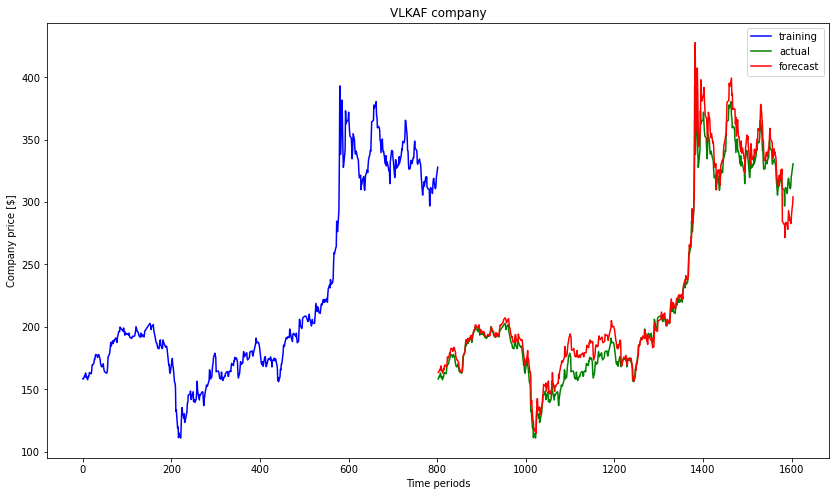

In [126]:
fig = plt.figure(figsize=(14, 8))
plt.title(f"{company} company")
plt.ylabel("Company price [\$]")
plt.xlabel("Time periods")
# for better plot - fill the hole + period tak samo
#tmp = np.append(X_test[i], Y_test[i][0])
# input_period_range = ^up (u gory)
plt.plot(range(0, test_X[:, 0].shape[0]), test_X[:, 0], "b-", label='training')  # "bo-" #X_test[i]
plt.plot(range(test_X[:, 0].shape[0], test_X[:, 0].shape[0]+inv_y.shape[0]), inv_y, "g-", label='actual')  # "go-"
plt.plot(range(test_X[:, 0].shape[0], test_X[:, 0].shape[0]+inv_yhat.shape[0]), inv_yhat, "r-", label='forecast')  # "ro-"
plt.legend()
# plt.ylim(min,max) #zakres y od min do max
#date_string = dt.datetime.now().strftime("%Y-%m-%d_%H-%M")
#plt.savefig(f"{LSTM_PLOTS_PATH}/{self.experiment_name}_prediction_plot_id_{imageid}_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.png")  # _{self.architecture_name}
plt.show()
plt.close(fig)

NameError: name 'np' is not defined

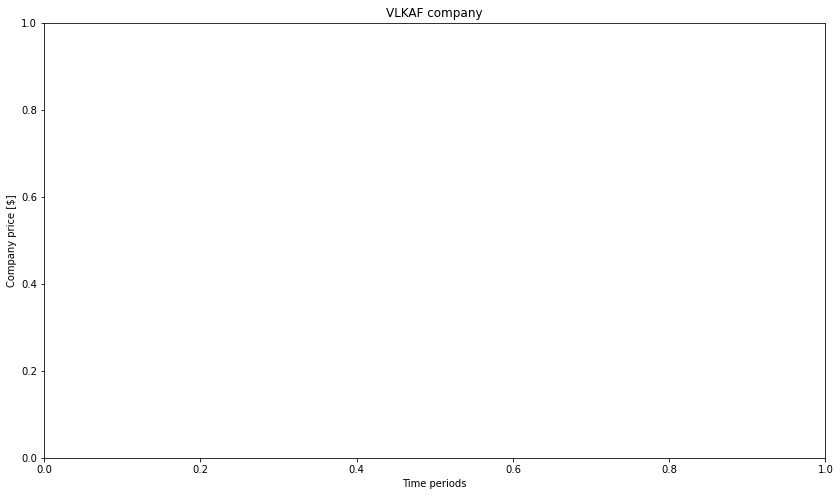

In [73]:
X_test = test_X 
Y_test = inv_y
Y_predict = inv_yhat
company_name_test = ['VLKAF']
input_period_start_date_test = ['2012-01-01']
input_period_end_date_test = ['2012-02-01']
output_period_start_date_test = ['2012-02-02']
output_period_end_date_test = ['2012-02-03']

imageid = 0
for i in range(len(Y_test)):  # len of X_test or Y_predict can be also used here
    imageid += 1
    company = company_name_test[i]

    input_start_date = input_period_start_date_test[i]
    input_end_date = input_period_end_date_test[i]
    output_start_date = output_period_start_date_test[i]
    output_end_date = output_period_end_date_test[i]

    # for clarity - change input_end_date in input_period_range to output_start_date
#     if self.input_averaging:
#         input_per_range = []
#         input_per_range.append(pd.Timestamp(input_start_date)) #here first value is added
#         for period in range(self.n_steps): #we start from 0 to n_steps-1, but we add +1 because of chart (the last date from input set + first from the output set)
#             input_per_range.append(pd.Timestamp(input_start_date) + DateOffset(days=30*(period+1)))
#         input_period_range = pd.DatetimeIndex(input_per_range)
#     else:
#         input_period_range = pd.date_range(input_start_date, output_start_date)

#     if self.output_averaging:
#         output_per_range = []
#         output_per_range.append(pd.Timestamp(output_start_date)) #here first value is added
#         for period in range(self.output_size-1): # -1 because we have added already first value
#             output_per_range.append(pd.Timestamp(output_start_date) + DateOffset(days=30 * (period + 1)))
#         output_period_range = pd.DatetimeIndex(output_per_range)
#     else:
#         output_period_range = pd.date_range(output_start_date, output_end_date)

#     assert len(input_period_range) == (self.n_steps + 1), 'wrong input period len'
#     assert len(output_period_range) == (self.output_size), 'wrong output period len'

    # temporary condition
    # if len(input_period_range) > self.input_window_size:
    #    input_period_range = input_period_range[:self.input_window_size]
    # if len(output_period_range) > self.output_window_size:
    #    output_period_range = output_period_range[:self.output_window_size]
    # x ranges
    # X_test_len = range(len(X_test[i]))
    # Y_test_len = range(X_test_len[-1], X_test_len[-1] + len(Y_test[i]))
    # Y_predict_len = range(X_test_len[-1], X_test_len[-1] + len(Y_predict[i]))
    fig = plt.figure(figsize=(14, 8))
    plt.title(f"{company} company")
    plt.ylabel("Company price [\$]")
    plt.xlabel("Time periods")

    # for better plot - fill the hole + period tak samo
    tmp = np.append(X_test[i], Y_test[i][0])
    # input_period_range = ^up (u gory)

    plt.plot(input_period_range, tmp, "b-", label='training')  # "bo-" #X_test[i]
    plt.plot(output_period_range, Y_test[i], "g-", label='actual')  # "go-"
    plt.plot(output_period_range, Y_predict[i], "r-", label='forecast')  # "ro-"
    plt.legend()
    # plt.ylim(min,max) #zakres y od min do max
    date_string = dt.datetime.now().strftime("%Y-%m-%d_%H-%M")
    #plt.savefig(f"{LSTM_PLOTS_PATH}/{self.experiment_name}_prediction_plot_id_{imageid}_input_window_{self.n_steps}_input_averaging_{self.input_averaging}_output_window{self.output_size}_output_averaging_{self.output_averaging}_{date_string}.png")  # _{self.architecture_name}
    plt.show()
    plt.close(fig)
    # print just 5/10 plots
    # TODO: maybe change this condition
    if i > 20:
        break
    break